<a href="https://colab.research.google.com/github/mohdasjadsheikh/Book-Recommendation-System/blob/main/BOOK_RECOMMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='red'>**BOOK RECOMMENDATION SYSTEM**

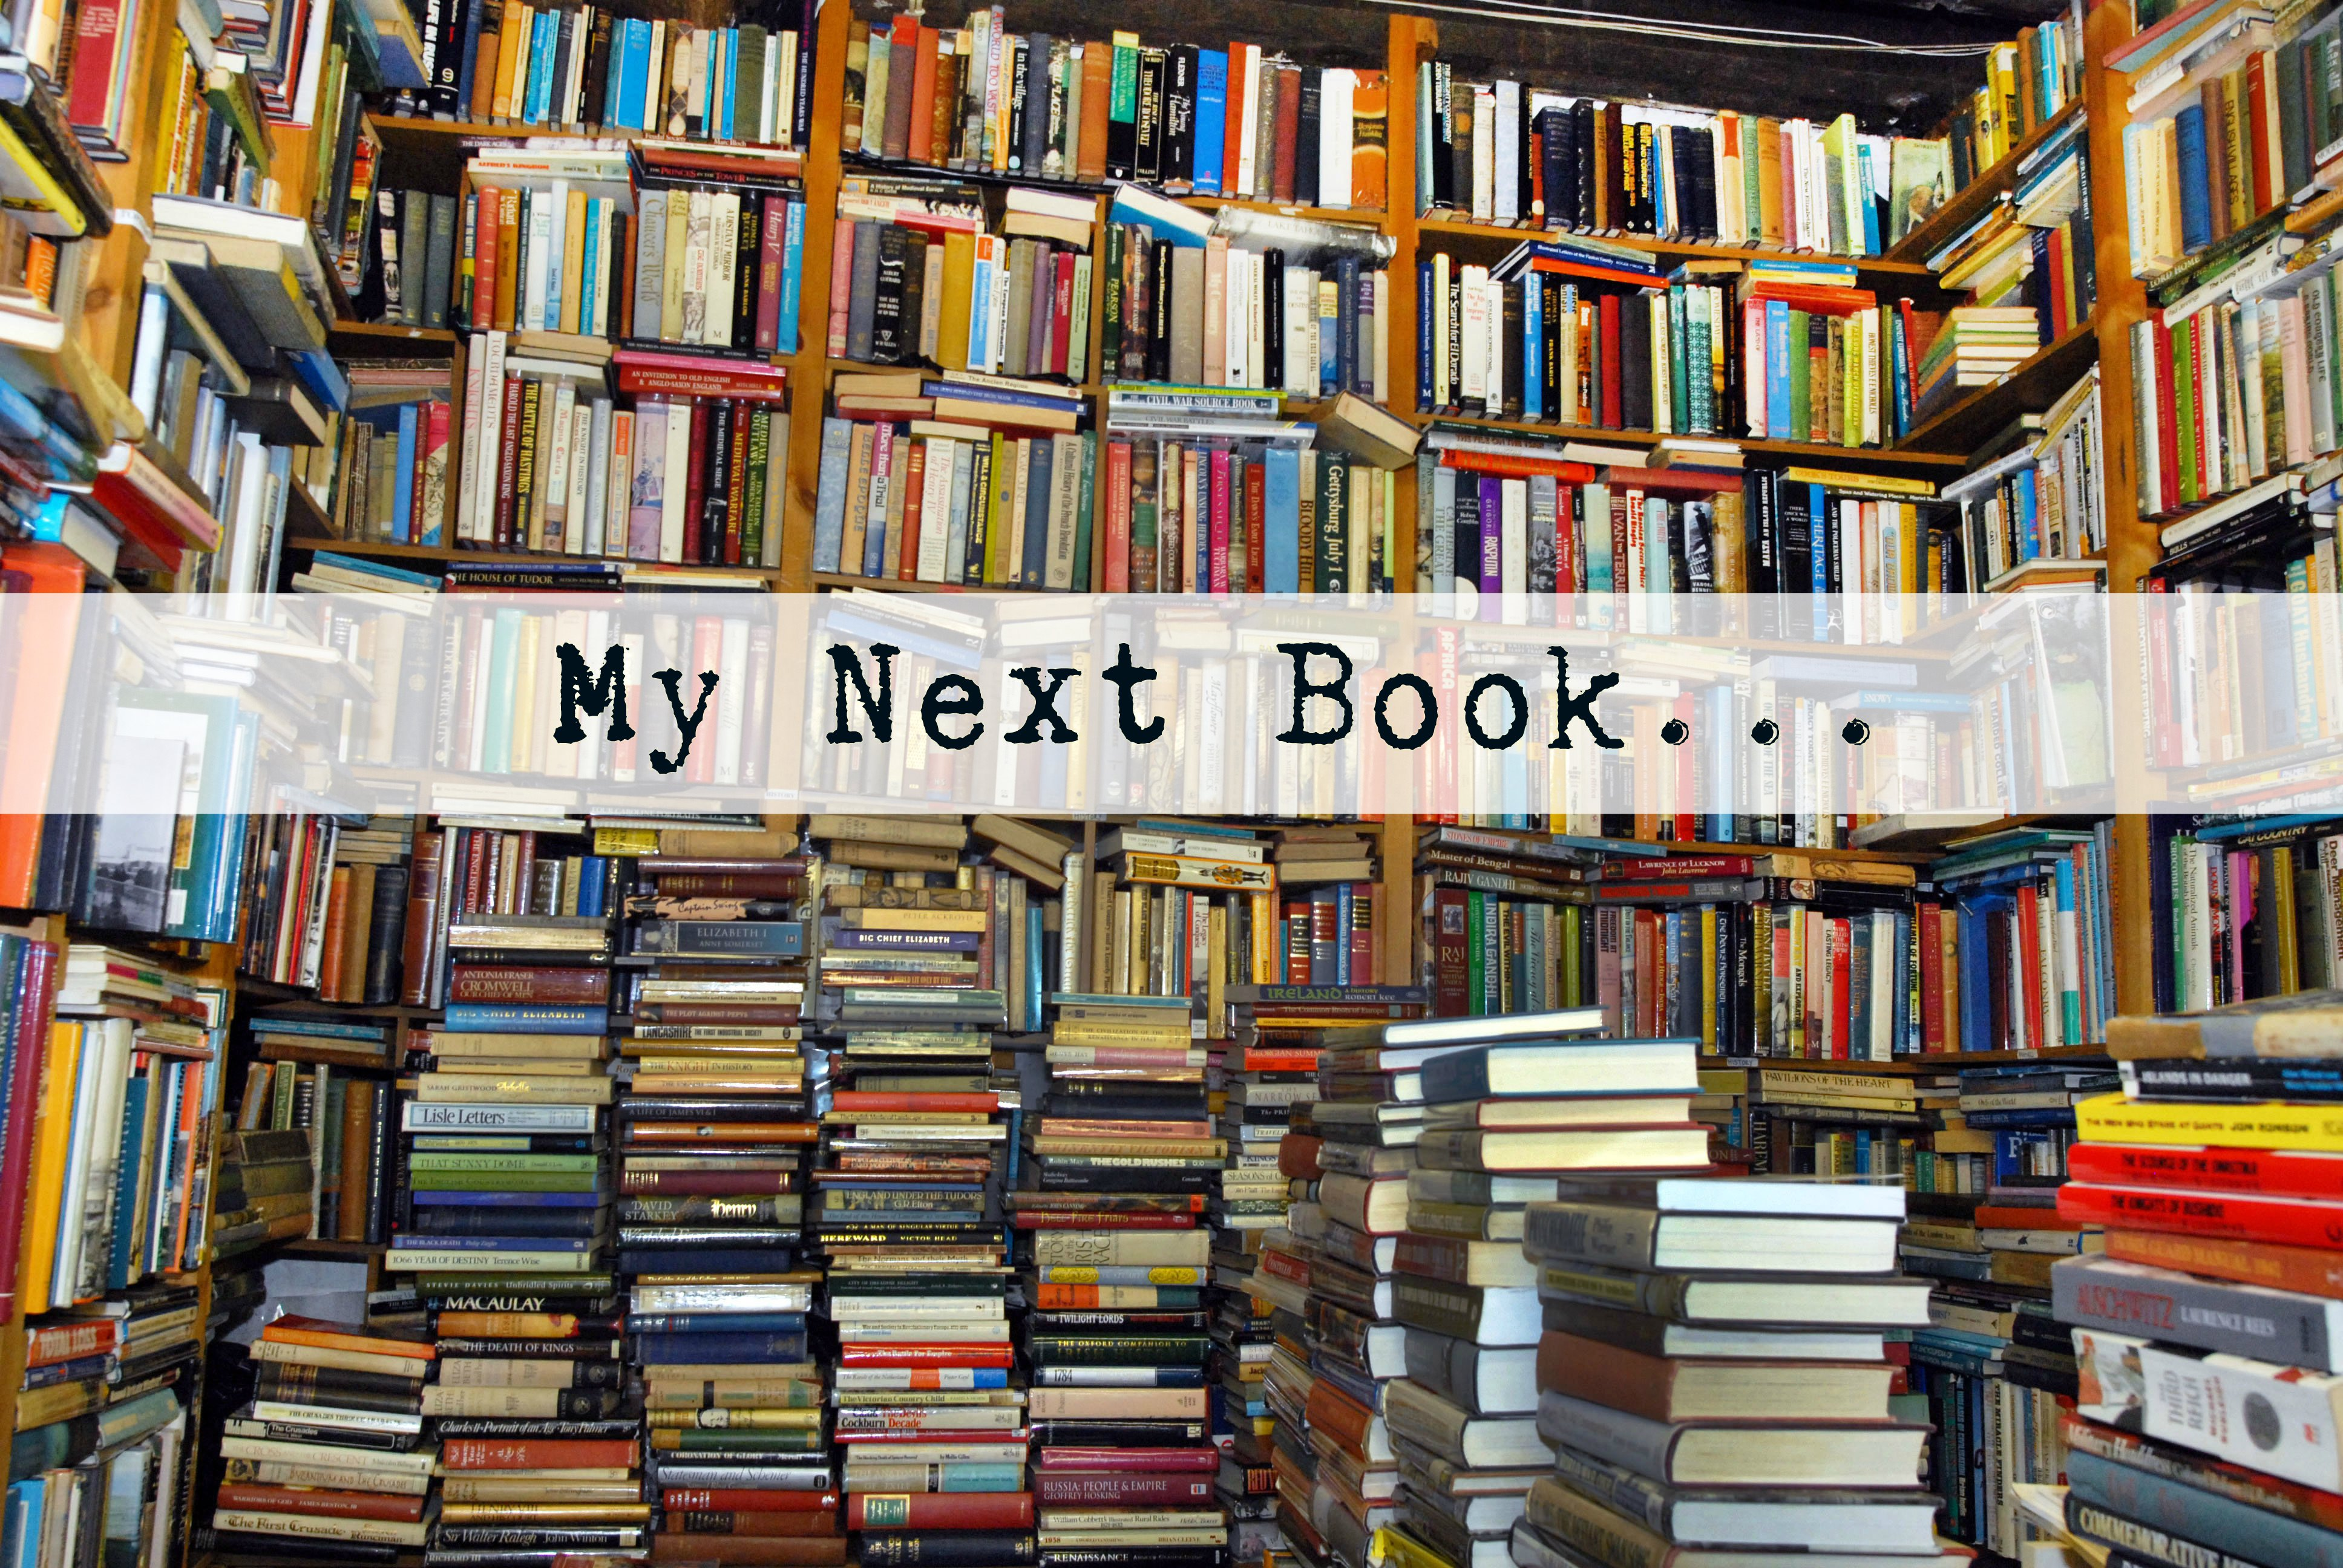

**<font color =blue> Project Type - Unsupervised ML <br>
Contribution - Individual<br>Project By - Mohd Asjad<br>Cohort - Chicago**

#<FONT COLOR = RED> **PROJECT SUMMARY**
---
###<FONT COLOR = BLUE>**Title: Book Recommendation System Using Unsupervised Machine Learning**<br><br>

---

**<FONT COLOR = green>
The goal of this project is to develop a book recommendation system using unsupervised machine learning techniques. The system will help users discover new books based on their preferences and similarities with other users. It will utilize a dataset of book ratings and user information to generate personalized recommendations.
<br><br>
The project will involve the following key steps:**
<br>
* <FONT COLOR = green> **Data collection and preprocessing: Gather a large dataset of book ratings and user information from various sources, such as online bookstores or public book review platforms. Preprocess the data by removing duplicates, handling missing values, and normalizing the ratings.**
<br>
* **Feature engineering: Extract relevant features from the dataset that can capture the characteristics of books and users. This may include genre, author, publication year, user demographics, and reading history.**
<br>
* **Clustering analysis: Apply unsupervised clustering algorithms, such as k-means or hierarchical clustering, to group similar books and users together based on their features. This step aims to identify clusters of books that share common attributes and users with similar reading preferences.**
<br>
* **Similarity calculation: Measure the similarity between books and users within each cluster using techniques like cosine similarity or Euclidean distance. This will enable the system to find books that are likely to be enjoyed by a particular user based on their similarities to other users with similar tastes.**
<br>
* **Recommendation generation: Generate personalized book recommendations for each user by considering their cluster membership and the similarity scores. The system will recommend books that are popular among users in the same cluster but have not been read by the target user.**
<br>
* **Evaluation and optimization: Assess the performance of the recommendation system using appropriate evaluation metrics, such as precision, recall, or mean average precision. Fine-tune the system by incorporating user feedback and iterating on the clustering and recommendation algorithms to improve the accuracy and relevance of the recommendations.**
<br>
* **Deployment and user interface: Develop a user-friendly interface that allows users to input their preferences and receive book recommendations. The system should provide an intuitive and seamless experience for users to explore and discover new books based on their interests.**
<br>
* **By implementing this book recommendation system using unsupervised machine learning techniques, users will benefit from personalized and relevant book recommendations, helping them broaden their reading choices and discover books they may have otherwise missed.**

#<font color = red> **GITHUB LINK**
---
[https://github.com/mohdasjadsheikh/Book-Recommendation-System/blob/58f018e5e8d5f35cf115c053ad7a8b3f6c42a560/BOOK_RECOMMENDATION_SYSTEM.ipynb]


#<font color='red'>**PROBLEM STATEMENT**

---


**<font color='green'>
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.**

<FONT COLOR=BLUE> **IMPORTING ALL THE NECESSARY LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# <font color='RED'>**THE DATASET**
---
**<font color='green'>
The Book-Recommendation dataset comprises 3 files.<br>**
<font color='blue'>
●  **Users** :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● **Books** : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● **Ratings** :<br>
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

##<font color=blue> **Importing The Datasets**

---



In [ ]:
books = pd.read_csv('/content/drive/MyDrive/Books/Books.csv.zip')
ratings = pd.read_csv('/content/drive/MyDrive/Books/Ratings.csv.zip')
users = pd.read_csv('/content/drive/MyDrive/Books/Users.csv.zip')

# **<font color='red'>DIMENSIONS OF DATASETS**

---



In [ ]:
books.describe()

ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271359               271360   
unique      271360          242135           102023                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq                                                    2   

                                              Image-URL-L  
count                                              271357  
unique                                             271041  
top     http://images.amazon.com/images/P/225307649X.0...  
freq                                                    2

In [ ]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [ ]:
ratings.describe()

User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01

In [ ]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [ ]:
users.describe()

User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

In [ ]:
users.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

In [ ]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year'},inplace=True)
users.rename(columns = {'User-ID':'user_id'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id'}, inplace=True)

In [ ]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [ ]:
books.head(50)

ISBN                                              title  \
0   0195153448                                Classical Mythology   
1   0002005018                                       Clara Callan   
2   0060973129                               Decision in Normandy   
3   0374157065  Flu: The Story of the Great Influenza Pandemic...   
4   0393045218                             The Mummies of Urumchi   
5   0399135782                             The Kitchen God's Wife   
6   0425176428  What If?: The World's Foremost Military Histor...   
7   0671870432                                    PLEADING GUILTY   
8   0679425608  Under the Black Flag: The Romance and the Real...   
9   074322678X            Where You'll Find Me: And Other Stories   
10  0771074670                        Nights Below Station Street   
11  080652121X  Hitler's Secret Bankers: The Myth of Swiss Neu...   
12  0887841740                                 The Middle Stories   
13  1552041778                                           Jane Doe   
14  1558746218  A Second Chicken Soup for the Woman's Soul (Ch...   
15  1567407781       The Witchfinder (Amos Walker Mystery Series)   
16  1575663937  More Cunning Than Man: A Social History of Rat...   
17  1881320189                      Goodbye to the Buttermilk Sky   
18  0440234743                                      The Testament   
19  0452264464               Beloved (Plume Contemporary Fiction)   
20  0609804618  Our Dumb Century: The Onion Presents 100 Years...   
21  1841721522  New Vegetarian: Bold and Beautiful Recipes for...   
22  1879384493  If I'd Known Then What I Know Now: Why Not Lea...   
23  0061076031  Mary-Kate &amp; Ashley Switching Goals (Mary-K...   
24  0439095026                       Tell Me This Isn't Happening   
25  0689821166                           Flood : Mississippi 1927   
26  0971880107                                        Wild Animus   
27  0345402871                                           Airframe   
28  0345417623                                           Timeline   
29  0684823802                           OUT OF THE SILENT PLANET   
30  0375759778                                   Prague : A Novel   
31  0425163091                                    Chocolate Jesus   
32  3404921038                               Wie Barney es sieht.   
33  3442353866    Der Fluch der Kaiserin. Ein Richter- Di- Roman.   
34  3442410665                                  Sturmzeit. Roman.   
35  3442446937                                 Tage der Unschuld.   
36  0375406328                                        Lying Awake   
37  0446310786                              To Kill a Mockingbird   
38  0449005615                     Seabiscuit: An American Legend   
39  0060168013                                     Pigs in Heaven   
40  038078243X                   Miss Zukas and the Raven's Dance   
41  055321215X                                Pride and Prejudice   
42  067176537X  The Therapeutic Touch: How to Use Your Hands t...   
43  0061099686                                           Downtown   
44  0553582909                                           Icebound   
45  0671888587                                 I'll Be Seeing You   
46  0553582747                         From the Corner of His Eye   
47  0425182908                                       Isle of Dogs   
48  042518630X                                    Purity in Death   
49  0440223571  This Year It Will Be Different: And Other Stories   

                          author  year                      Publisher  \
0             Mark P. O. Morford  2002        Oxford University Press   
1           Richard Bruce Wright  2001          HarperFlamingo Canada   
2                   Carlo D'Este  1991                HarperPerennial   
3               Gina Bari Kolata  1999           Farrar Straus Giroux   
4                E. J. W. Barber  1999     W. W. Norton &amp; Company   
5                        Amy Tan  1991              

In [ ]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [ ]:
missing_values(users)

index  Missing Values  % of Total Values Data_type
0       Age          110762              39.72   float64
1   user_id               0               0.00     int64
2  Location               0               0.00    object

<font color='red'>**Age Column has 39% Missing Values**

---



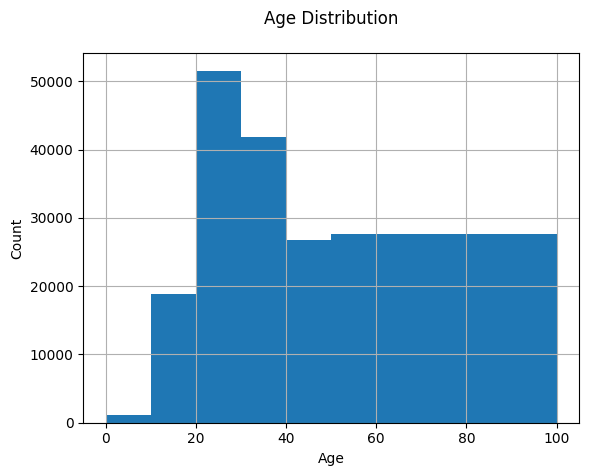

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<font color='red'>**The most active users are amongst those who are in their 20s & 30s.**

<font color='red'>**Let's check for outliers in age column**

---



Text(0.5, 1.0, 'Find outlier data in Age column')

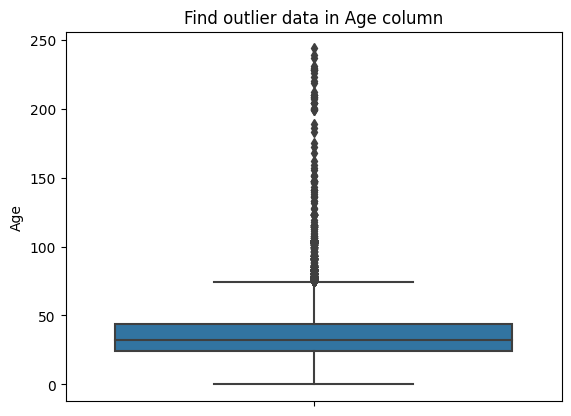

In [ ]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

In [ ]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<font color='red'>**Age : 244 <br>
Ok we have Outlier point in Age**

#<font color='red'>**Finding unique Values in Location Column**

---




In [ ]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
users.Location.nunique()

57339

**<font color='red'>57339 unique Values is obviously hard to understand<br>
So lets create column <font color='blue'>"Country"**

In [ ]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
users.Country.nunique()

529

In [ ]:
users.head()

user_id                            Location   Age         Country
0        1                  nyc, new york, usa   NaN             usa
1        2           stockton, california, usa  18.0             usa
2        3     moscow, yukon territory, russia   NaN          russia
3        4           porto, v.n.gaia, portugal  17.0        portugal
4        5  farnborough, hants, united kingdom   NaN  united kingdom

In [ ]:
users.isnull().sum()

user_id          0
Location         0
Age         110762
Country        368
dtype: int64

In [ ]:
users['Country']=users['Country'].astype('str')

In [ ]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

#<font color='red'>**Correct the Misspelled Words**

---



In [ ]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

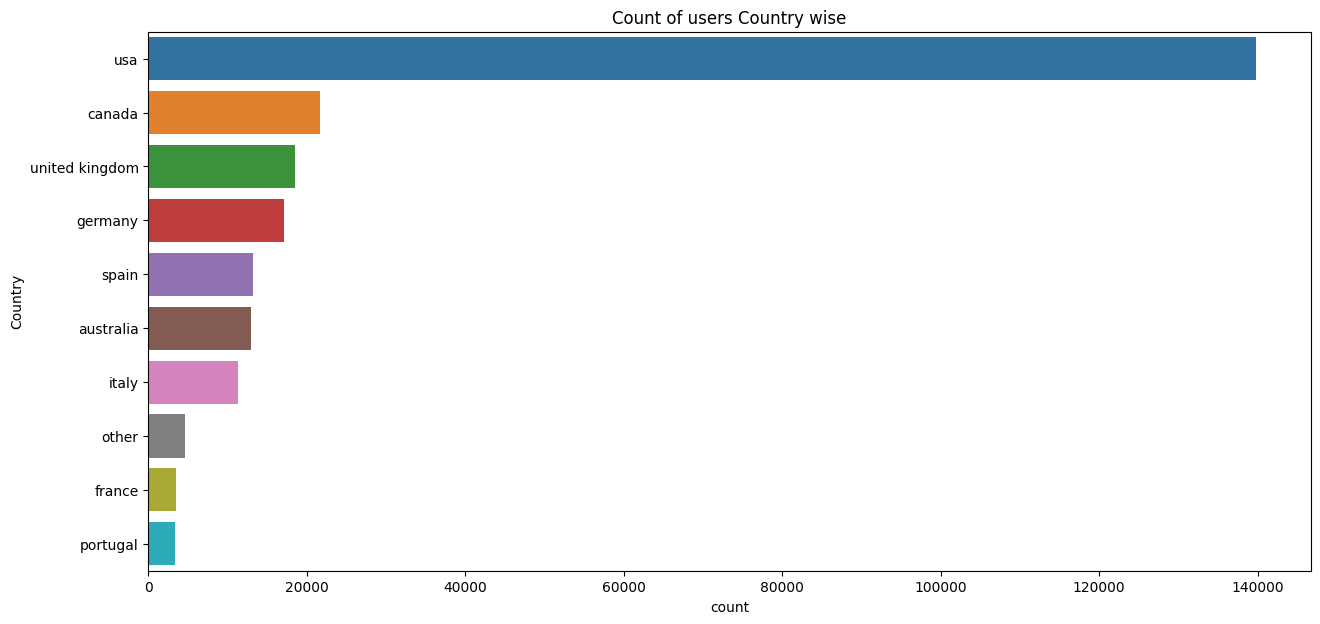

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

#<font color='red'> **Most Number of users belongs to U.S.A.**

#<font color='red'> **Treating Outliers**

---



Text(0.5, 1.0, 'Age Distribution Plot')

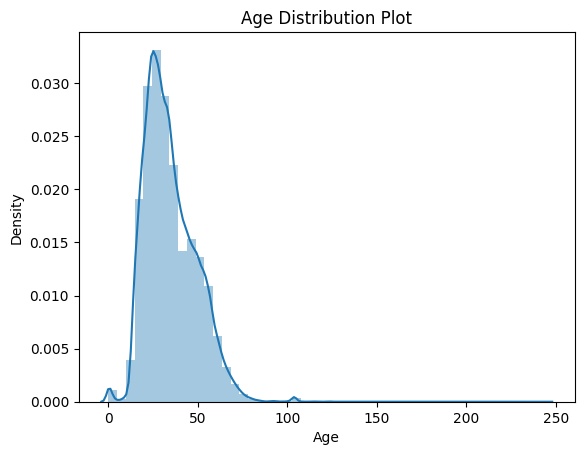

In [ ]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

**<font color='red'>Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaN**

In [ ]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [ ]:
users.isna().sum()

user_id          0
Location         0
Age         112010
Country          0
dtype: int64

**<font color='red'>Age has positive Skewness (right tail)
so we can use median to fill Nan values,
but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.**

In [ ]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [ ]:
users.isna().sum()

user_id       0
Location      0
Age         276
Country       0
dtype: int64

#**<font color='red'> Still we have 276 NaN values lets fill them with median**

---



In [ ]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [ ]:
users.isna().sum()

user_id     0
Location    0
Age         0
Country     0
dtype: int64

#**<font color='red'> Now it's look Good**

#**<font color='red'> Let's find the Top Authors**

---



Text(0.5, 1.0, 'Top 10 Authors')

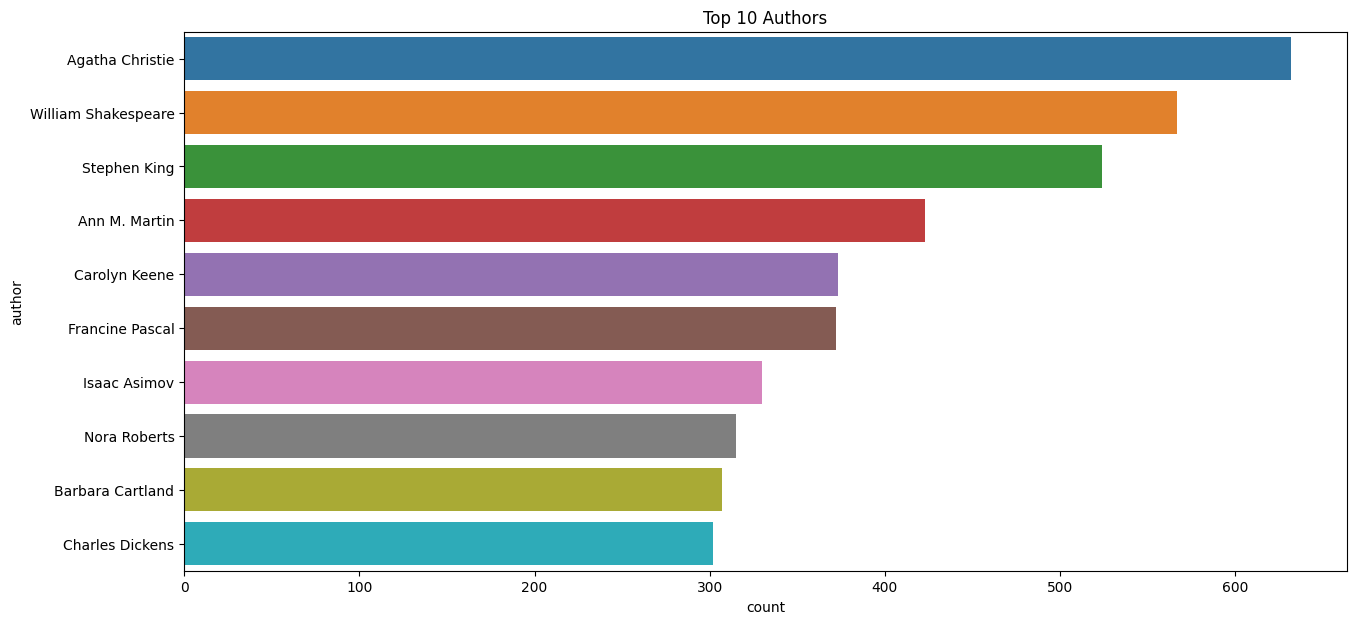

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='author',data=books,order=pd.value_counts(books['author']).iloc[:10].index)
plt.title('Top 10 Authors')

Text(0.5, 1.0, 'Top 10 Publishers')

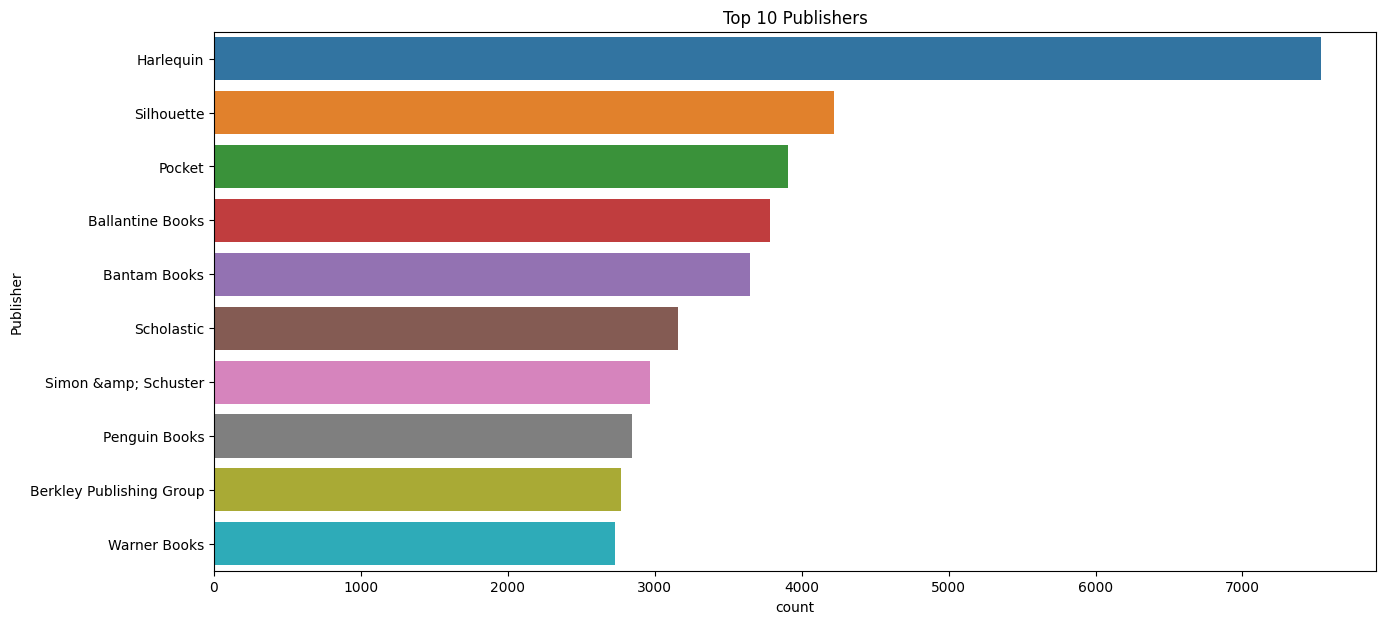

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [ ]:
books['year']=books['year'].astype('str')
a=list(books['year'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


#<font color='red'> **we have found out that in year column two values named {<font color='blue'>'DK Publishing Inc', 'Gallimard'}<font color='red'> is present over there which is clearly an error in dataset So then lets find out those Books having year of publication is these two words instead of Year.**

In [ ]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['year'] == 'DK Publishing Inc',:]

ISBN                                              title author  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   2000   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   2000   

                     year                                          Publisher  \
209538  DK Publishing Inc  http://images.amazon.com/images/P/078946697X.0...   
221678  DK Publishing Inc  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

<font color='red'>**As it can be seen in the above data that there are some incorrect
entries in Year field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year in dataset due to an error in csv file**

In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','year'] = 2000
books.loc[books.ISBN == '0789466953','author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','year'] = 2000
books.loc[books.ISBN == '078946697X','author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

ISBN                                              title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

                    author  year          Publisher  \
209538  Michael Teitelbaum  2000  DK Publishing Inc   
221678       James Buckley  2000  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  \
209538  http://images.amazon.com/images/P/078946697X.0...         NaN   
221678  http://images.amazon.com/images/P/0789466953.0...         NaN   

                                               Book-Title  
209538  DK Readers: Creating the X-Men, How It All Beg...  
221678  DK Readers: Creating the X-Men, How Comic Book...

In [ ]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['year'] == 'Gallimard',:]

ISBN                                              title author  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   2003   

             year                                          Publisher  \
220731  Gallimard  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  \
220731  http://images.amazon.com/images/P/2070426769.0...         NaN   

       Book-Title  
220731        NaN

In [ ]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','year'] = 2003
books.loc[books.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

ISBN                                              title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

                                 author  year  Publisher  \
220731  Jean-Marie Gustave Le ClÃ?Â©zio  2003  Gallimard   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  \
220731  http://images.amazon.com/images/P/2070426769.0...         NaN   

                                   Book-Title  
220731  Peuple du ciel, suivi de 'Les Bergers

In [ ]:
books['year']=pd.to_numeric(books['year'], errors='coerce')

print(sorted(books['year'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**<font color='red'>The value 0 for Year-Of-Publication(year) is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be
invalid and setting invalid years as NaN.**

**Reference of the fact:** http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [ ]:
books.loc[(books['year'] > 2006) | (books['year'] == 0),'year'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['year'].fillna(round(books['year'].median()), inplace=True)

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
books.isna().sum()

ISBN               0
title              0
author             1
year               0
Publisher          2
Book-Title    271357
dtype: int64

In [ ]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]
#two NaNs

ISBN            title           author    year Publisher  \
128890  193169656X      Tyrant Moon  Elaine Corvidae  2002.0       NaN   
129037  1931696993  Finders Keepers  Linnea Sinclair  2001.0       NaN   

       Book-Title  
128890        NaN  
129037        NaN

In [ ]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [ ]:
#exploring 'Book-Author' column
books.loc[books['author'].isnull(),:]

ISBN                                              title author  \
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...    NaN   

          year                       Publisher Book-Title  
187689  1995.0  Edinburgh Financial Publishing        NaN

In [ ]:
#Filling Nan of book-Author with others
books['author'].fillna('other',inplace=True)

In [ ]:
books.isna().sum()

ISBN               0
title              0
author             0
year               0
Publisher          0
Book-Title    271357
dtype: int64

# **<font color='red'> Analysing the Ratings Dataset**

---



In [ ]:
ratings.head(5)

user_id        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

<font color='blue'>**Ratings dataset should have books only which exist in our books dataset**


In [ ]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

**<font color='blue'>It can be seen that many rows having book ISBN not part of books dataset got dropped off**

**<font color='blue'>Ratings dataset should have ratings from users which exist in users dataset.**

In [ ]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['user_id'].isin(users['user_id'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


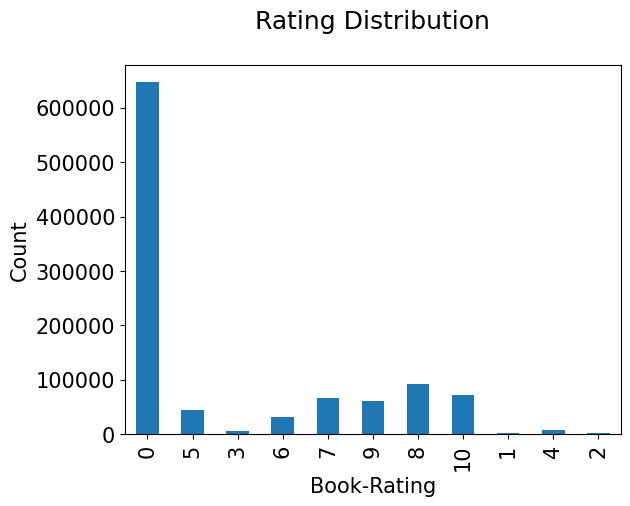

In [ ]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.show()

<font color='blue'>**The ratings are very unevenly distributed, and the vast majority of ratings are Zero(0). As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information.On a scale of 1-10 Ratings are either explicitly expressed higher values denoting higher appreciation, or implicit, expressed by 0. Hence segregating Implicit and Explict ratings datasets.**



In [ ]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

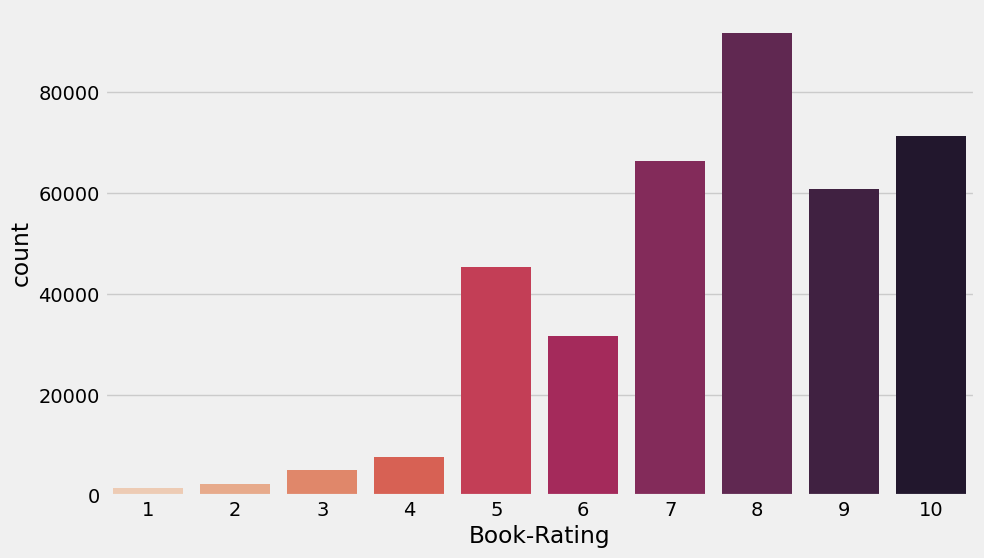

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

# **<font color='blue'>It can be observe that Higher ratings are more common amongst users and 8 rating has been the highest number of times.**

#**<font color= 'red'>Let's find out the Top 5 books rated by Maximum number of users.**

---



In [ ]:
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

Book-Rating
ISBN                   
0316666343          707
0971880107          581
0385504209          487
0312195516          383
0060928336          320

**<font color= 'blue'>The book with ISBN '0316666343' received most ratings counts. Let’s find out what book it is, and what books are in the top 5.**

In [ ]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

ISBN                                            title         author  \
0  0316666343                        The Lovely Bones: A Novel   Alice Sebold   
1  0971880107                                      Wild Animus   Rich Shapero   
2  0385504209                                The Da Vinci Code      Dan Brown   
3  0312195516              The Red Tent (Bestselling Backlist)  Anita Diamant   
4  0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   

     year      Publisher Book-Title  
0  2002.0  Little, Brown        NaN  
1  2004.0        Too Far        NaN  
2  2003.0      Doubleday        NaN  
3  1998.0    Picador USA        NaN  
4  1997.0      Perennial        NaN

In [ ]:
# Create column Rating average
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
ratings_explicit.head()

user_id        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
1    276726  0155061224            5    5.000000                        1
3    276729  052165615X            3    3.000000                        1
4    276729  0521795028            6    6.000000                        1
8    276744  038550120X            7    7.580247                       81
16   276747  0060517794            9    8.000000                       30

# **<font color='red'> Merging All Dataset.**

---



In [ ]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='user_id')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [ ]:
Final_Dataset.head()

user_id                   Location   Age Country        ISBN  Book-Rating  \
0        8   timmins, ontario, canada  33.0  canada  0002005018            5   
1    11676              n/a, n/a, n/a  28.0     nan  0002005018            8   
2    67544   toronto, ontario, canada  30.0  canada  0002005018            8   
3   116866                  ottawa, ,  32.0   other  0002005018            9   
4   123629  kingston, ontario, canada  33.0  canada  0002005018            9   

   Avg_Rating  Total_No_Of_Users_Rated         title                author  \
0    7.666667                        9  Clara Callan  Richard Bruce Wright   
1    7.666667                        9  Clara Callan  Richard Bruce Wright   
2    7.666667                        9  Clara Callan  Richard Bruce Wright   
3    7.666667                        9  Clara Callan  Richard Bruce Wright   
4    7.666667                        9  Clara Callan  Richard Bruce Wright   

     year              Publisher Book-Title  
0  2001.0  HarperFlamingo Canada        NaN  
1  2001.0  HarperFlamingo Canada        NaN  
2  2001.0  HarperFlamingo Canada        NaN  
3  2001.0  HarperFlamingo Canada        NaN  
4  2001.0  HarperFlamingo Canada        NaN

In [ ]:
missing_values(Final_Dataset)

index  Missing Values  % of Total Values Data_type
0                Book-Title          383841              100.0    object
1                   user_id               0                0.0     int64
2                  Location               0                0.0    object
3                       Age               0                0.0   float64
4                   Country               0                0.0    object
5                      ISBN               0                0.0    object
6               Book-Rating               0                0.0     int64
7                Avg_Rating               0                0.0   float64
8   Total_No_Of_Users_Rated               0                0.0     int64
9                     title               0                0.0    object
10                   author               0                0.0    object
11                     year               0                0.0   float64
12                Publisher               0                0.0    object

In [ ]:
Final_Dataset.shape

(383842, 13)

# <font color='red'>**Popularity Based Filtering**

---



**<font color='blue'>As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,**<br>
*  <font color='blue'>**v is the number of votes for the books;**<br>
*  <font color='blue'>**m is the minimum votes required to be listed in the chart;**<br>
*  <font color='blue'>**R is the average rating of the book;** and<br>
*  <font color='blue'>**C is the mean vote across the whole report.**<br>
*  <font color='blue'>**Now we find the values of v,m,R,C.**

In [ ]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 13)

**<font color='blue'>Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:**


In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('indigo',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 25 books
Top_Books[['title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(25).style.background_gradient(cmap=cm)

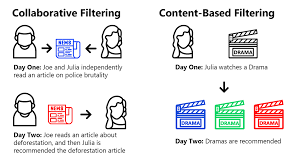

#<font color='red'>**Model Based Collaborative Filtering Recommender System**

---



* <font color='blue'>The goal of the recommender system is to predict user preference for a set of items based on the past experience.
<br>
* <font color='blue'>Two of the most popular approaches are Content-Based filtering and
Collaborative Filtering.
<br>
* <font color='blue'>Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms:**Memory based and Model based**.
<br>
* <font color='blue'>Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
<br>
* <font color='blue'>The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [ ]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

**<font color='blue'>This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
<br>
The recommender systems will be built using surprise package (Matrix Factorization - based models).**

In [ ]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [ ]:
user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [ ]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


**<font color='red'> SVD and NMF models comparison<br>
<font color='blue'>Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.**


In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()



test_rmse    1.602462
test_mae     1.240085
fit_time     2.877230
test_time    0.773362
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.620569
test_mae     2.238930
fit_time     6.627830
test_time    0.593683
dtype: float64

**<font color='blue'>
It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.**

##<font color='red'>**Optimisation of SVD algorithm**<br>

---
* <font color='blue'>Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
<br>
* <font color='blue'>It is used to find the best setting of parameters:
<br>
* <font color='blue'>n_factors - the number of factors<br>
* <font color='blue'>n_epochs - the number of iteration of the SGD procedure<br>
* <font color='blue'>lr_all - the learning rate for all parameters<br>
* <font color='blue'>reg_all - the regularization term for all parameters<br>
* <font color='blue'>As a result, regarding the majority of parameters, the default setting is the most optimal one.
* <font color='blue'>The improvement obtained with Grid Search is very small.

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5950889075661203
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

user_id        isbn  actual_rating  pred_rating  impossible  \
22603     7346  0807083178            9.0     7.580852       False   
7093    133166  051513449X            7.0     7.868648       False   
294     148863  0688170528           10.0     7.671127       False   
13024   234708  0385315724            7.0     7.407323       False   
26563    93565  0515132268            8.0     7.486118       False   

       pred_rating_round   abs_err  
22603                8.0  1.419148  
7093                 8.0  0.868648  
294                  8.0  2.328873  
13024                7.0  0.407323  
26563                7.0  0.513882

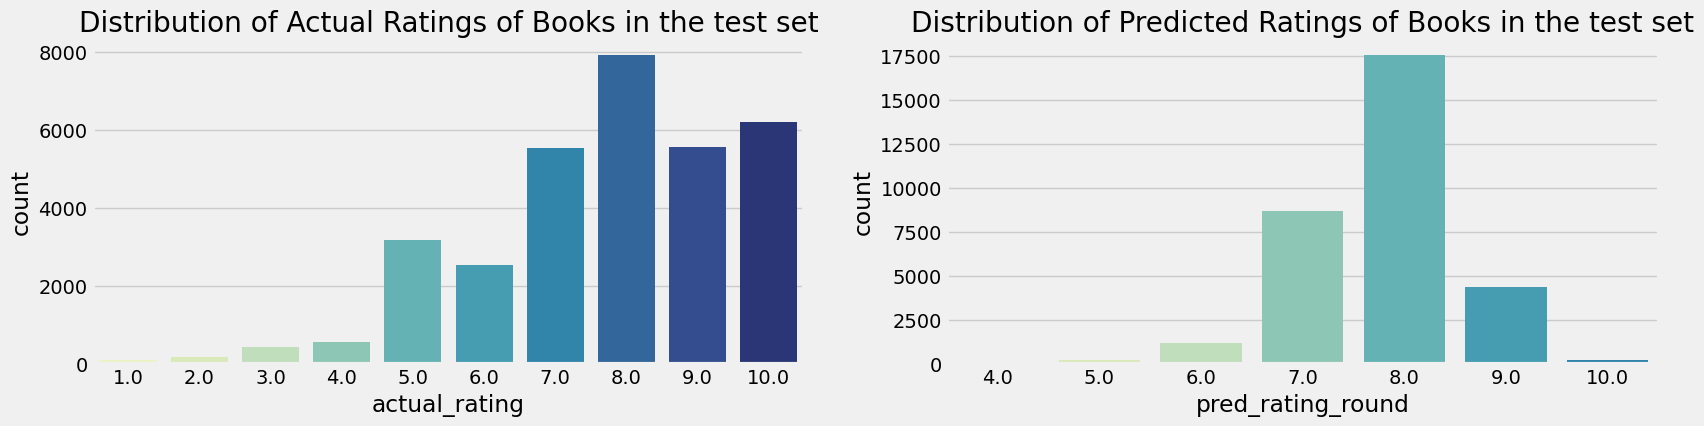

In [ ]:
palette = sns.color_palette("YlGnBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of Actual Ratings of Books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of Predicted Ratings of Books in the test set')

plt.show()

#<font color='RED'>**Absolute Error of predicted Ratings**

---



* <font color='blue'>The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.

* <font color='blue'>How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value)The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

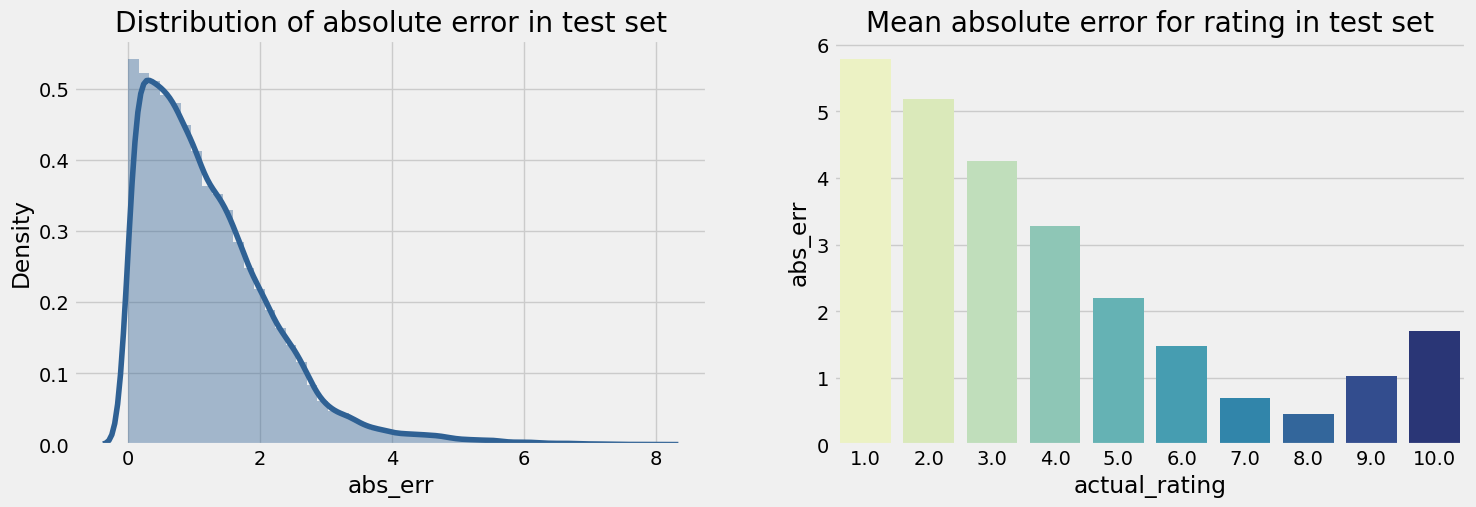

In [ ]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

# <font color='red'>**Analysis of predicted ratings of a particular user**

---


For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [ ]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

###**<font color='red'>Train set: Top rated books**

---



In [ ]:
selected_user_id = 277427
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(20)

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated  \
209   277427  0385503857            9    8.375000                       32   
223   277427  0441627404           10    7.931034                       29   
276   277427  1572304510           10    9.000000                        4   
197   277427  0060006641           10    9.000000                        4   
206   277427  038081904X            9    7.666667                        6   
263   277427  0836218515           10    8.608696                       23   
272   277427  1400060265           10    7.875000                        8   
230   277427  0451203593           10    7.708333                       24   
227   277427  0446608890           10    7.325581                       43   
258   277427  0811802981           10    8.916667                       24   
224   277427  0446350982            9    7.954545                       22   
245   277427  0679417648           10    8.857143                        7   
265   277427  0836221192           10    8.250000                       20   
202   277427  0345413903           10    7.753623                       69   
236   277427  0553573926           10    8.444444                       18   
269   277427  0890876517           10    8.714286                       14   
267   277427  0836236688           10    8.333333                       15   
241   277427  0671727079            9    8.750000                        4   
277   277427  1576733343           10    9.250000                        4   
251   277427  0743412028            9    7.610169                       59   

    book_title  pred_rating  
209        NaN          NaN  
223        NaN          NaN  
276        NaN          NaN  
197        NaN          NaN  
206        NaN          NaN  
263        NaN          NaN  
272        NaN          NaN  
230        NaN          NaN  
227        NaN          NaN  
258        NaN          NaN  
224        NaN          NaN  
245        NaN          NaN  
265        NaN          NaN  
202        NaN          NaN  
236        NaN          NaN  
269        NaN          NaN  
267        NaN          NaN  
241        NaN          NaN  
277        NaN          NaN  
251        NaN          NaN

### **<font color='red'>Test set: predicted top rated books**

---



In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated  \
204   277427  0380702843            8    8.666667                       21   
233   277427  0553280368            9    8.296296                       54   
256   277427  0786866845           10    8.172414                       29   
255   277427  0767903382           10    7.968750                       32   
235   277427  0553571656           10    8.032258                       31   

    book_title  pred_rating  
204        NaN     8.955015  
233        NaN     8.905862  
256        NaN     8.783051  
255        NaN     8.714206  
235        NaN     8.701274

### **<font color='red'>Test set: actual top rated books**

---



In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated  \
235   277427  0553571656           10    8.032258                       31   
255   277427  0767903382           10    7.968750                       32   
273   277427  1559586893           10    8.500000                        4   
259   277427  0811811409           10    8.050000                       20   
256   277427  0786866845           10    8.172414                       29   

    book_title  pred_rating  
235        NaN     8.701274  
255        NaN     8.714206  
273        NaN     8.273005  
259        NaN     8.402227  
256        NaN     8.783051

In [ ]:
df_user.describe()

user_id  book_rating  Avg_Rating  Total_No_Of_Users_Rated  pred_rating
count      83.0    83.000000   83.000000                83.000000    17.000000
mean   277427.0     8.734940    7.913301                32.457831     8.494492
std         0.0     1.316725    0.715051                59.820117     0.271984
min    277427.0     5.000000    5.875000                 4.000000     7.979241
25%    277427.0     8.000000    7.500000                 8.000000     8.317186
50%    277427.0     9.000000    7.931034                18.000000     8.463764
75%    277427.0    10.000000    8.333333                29.000000     8.701274
max    277427.0    10.000000    9.454545               487.000000     8.955015

## **<font color='red'>Collaborative Filtering based Recommendation System--(Item-Item Based)**

---



In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [ ]:
df_ratings_top.head()

user_id        isbn  book_rating  Avg_Rating  Total_No_Of_Users_Rated
16   276747  0060517794            9    8.000000                       30
19   276747  0671537458            9    7.176471                       17
20   276747  0679776818            8    7.476190                       21
59   276772  0553572369            7    6.625000                        8
61   276772  3499230933           10    7.166667                        6

In [ ]:
df_ratings_top.rename(columns={'isbn':'ISBN'},inplace=True)

In [ ]:
df_ratings_top.head()

user_id        ISBN  book_rating  Avg_Rating  Total_No_Of_Users_Rated
16   276747  0060517794            9    8.000000                       30
19   276747  0671537458            9    7.176471                       17
20   276747  0679776818            8    7.476190                       21
59   276772  0553572369            7    6.625000                        8
61   276772  3499230933           10    7.166667                        6

#<font color ='red'>**Implementing KNN**

---



In [ ]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='user_id', columns='ISBN', values='book_rating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(18549, 13740)


ISBN     0002005018  0002251760  0002558122  0003300277  000617616X  \
user_id                                                               
8               5.0         NaN         NaN         NaN         NaN   
17              NaN         NaN         NaN         NaN         NaN   
53              NaN         NaN         NaN         NaN         NaN   
92              NaN         NaN         NaN         NaN         NaN   
99              NaN         NaN         NaN         NaN         NaN   

ISBN     0006480764  000648302X  0006485200  000649840X  0006511767  ...  \
user_id                                                              ...   
8               NaN         NaN         NaN         NaN         NaN  ...   
17              NaN         NaN         NaN         NaN         NaN  ...   
53              NaN         NaN         NaN         NaN         NaN  ...   
92              NaN         NaN         NaN         NaN         NaN  ...   
99              NaN         NaN         NaN         NaN         NaN  ...   

ISBN     9500723832  950491036X  9505156642  9505156944  9580464162  \
user_id                                                               
8               NaN         NaN         NaN         NaN         NaN   
17              NaN         NaN         NaN         NaN         NaN   
53              NaN         NaN         NaN         NaN         NaN   
92              NaN         NaN         NaN         NaN         NaN   
99              NaN         NaN         NaN         NaN         NaN   

ISBN     958704049X  9681500555  9722016563  9812327975  9871138148  
user_id                                                              
8               NaN         NaN         NaN         NaN         NaN  
17              NaN         NaN         NaN         NaN         NaN  
53              NaN         NaN         NaN         NaN         NaN  
92              NaN         NaN         NaN         NaN         NaN  
99              NaN         NaN         NaN         NaN         NaN  

[5 rows x 13740 columns]

In [ ]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18549 13740


In [ ]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [ ]:
#checking first few rows
ratings_matrix.head(5)

ISBN     0002005018  0002251760  0002558122  0003300277  000617616X  \
user_id                                                               
8                 5           0           0           0           0   
17                0           0           0           0           0   
53                0           0           0           0           0   
92                0           0           0           0           0   
99                0           0           0           0           0   

ISBN     0006480764  000648302X  0006485200  000649840X  0006511767  ...  \
user_id                                                              ...   
8                 0           0           0           0           0  ...   
17                0           0           0           0           0  ...   
53                0           0           0           0           0  ...   
92                0           0           0           0           0  ...   
99                0           0           0           0           0  ...   

ISBN     9500723832  950491036X  9505156642  9505156944  9580464162  \
user_id                                                               
8                 0           0           0           0           0   
17                0           0           0           0           0   
53                0           0           0           0           0   
92                0           0           0           0           0   
99                0           0           0           0           0   

ISBN     958704049X  9681500555  9722016563  9812327975  9871138148  
user_id                                                              
8                 0           0           0           0           0  
17                0           0           0           0           0  
53                0           0           0           0           0  
92                0           0           0           0           0  
99                0           0           0           0           0  

[5 rows x 13740 columns]

In [ ]:
sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [ ]:
combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['author','year', 'Publisher']

In [ ]:
combine_book_rating.shape

(1031136, 8)

In [ ]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'user_id':'userID','title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

userID        ISBN  bookRating             bookTitle Book-Title
0  276725  034545104X           0  Flesh Tones: A Novel        NaN
1    2313  034545104X           5  Flesh Tones: A Novel        NaN
2    6543  034545104X           0  Flesh Tones: A Novel        NaN
3    8680  034545104X           5  Flesh Tones: A Novel        NaN
4   10314  034545104X           9  Flesh Tones: A Novel        NaN

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [ ]:
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [ ]:
book_ratingcount.head()

bookTitle  TotalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 4
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Ask Lily (Young Women of Faith: Lily Series, ...                 1
4   Beyond IBM: Leadership Marketing and Finance ...                 1

In [ ]:
book_ratingcount.shape

(241071, 2)

**<font color='blue'>Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books.**

In [ ]:
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'outer' )

In [ ]:
rating_with_totalratingcount.head()

userID        ISBN  bookRating             bookTitle Book-Title  \
0  276725  034545104X           0  Flesh Tones: A Novel        NaN   
1    2313  034545104X           5  Flesh Tones: A Novel        NaN   
2    6543  034545104X           0  Flesh Tones: A Novel        NaN   
3    8680  034545104X           5  Flesh Tones: A Novel        NaN   
4   10314  034545104X           9  Flesh Tones: A Novel        NaN   

   TotalRatingCount  
0                60  
1                60  
2                60  
3                60  
4                60

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


**<font color='blue'>The median book has been rated only once. Let’s look at the top of the distribution:**

In [ ]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


**<font color='blue'>About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.**

In [ ]:
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [ ]:
rating_popular_book.head()

userID        ISBN  bookRating             bookTitle Book-Title  \
0  276725  034545104X           0  Flesh Tones: A Novel        NaN   
1    2313  034545104X           5  Flesh Tones: A Novel        NaN   
2    6543  034545104X           0  Flesh Tones: A Novel        NaN   
3    8680  034545104X           5  Flesh Tones: A Novel        NaN   
4   10314  034545104X           9  Flesh Tones: A Novel        NaN   

   TotalRatingCount  
0                60  
1                60  
2                60  
3                60  
4                60

In [ ]:
rating_popular_book.shape


(288740, 6)

In [ ]:
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 6)
New dataframe shape (285518, 6)
Removed 3222 rows


In [ ]:
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

#<font color='red'>**Finding the Nearest Neighbors**

---



In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

# <font color='red'>**Test our model and Make few Recommnedations**

---



In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Idoru:

1: Neuromancer (Remembering Tomorrow), with distance of 0.8484946340440314:
2: House Atreides (Dune: House Trilogy, Book 1), with distance of 0.8965138005065116:
3: Vittorio the Vampire: New Tales of the Vampires, with distance of 0.9012702548248747:
4: Night Chills, with distance of 0.9019187361141368:
5: Pandora : New Tales of the Vampires, with distance of 0.9020823910304007:


In [ ]:
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [ ]:
us_canada_user_rating_pivot2.head()

bookTitle  10 Lb. Penalty  16 Lighthouse Road  1984  1st to Die: A Novel  \
userID                                                                     
8                   0.000               0.000 0.000                0.000   
9                   0.000               0.000 0.000                0.000   
14                  0.000               0.000 0.000                0.000   
16                  0.000               0.000 0.000                0.000   
17                  0.000               0.000 0.000                0.000   

bookTitle  2010: Odyssey Two  204 Rosewood Lane  2061: Odyssey Three  \
userID                                                                 
8                      0.000              0.000                0.000   
9                      0.000              0.000                0.000   
14                     0.000              0.000                0.000   
16                     0.000              0.000                0.000   
17                     0.000              0.000                0.000   

bookTitle  24 Hours  2nd Chance  3rd Degree  ...  YOU BELONG TO ME  \
userID                                       ...                     
8             0.000       0.000       0.000  ...             0.000   
9             0.000       0.000       0.000  ...             0.000   
14            0.000       0.000       0.000  ...             0.000   
16            0.000       0.000       0.000  ...             0.000   
17            0.000       0.000       0.000  ...             0.000   

bookTitle  Year of Wonders  You Belong To Me  You Shall Know Our Velocity  \
userID                                                                      
8                    0.000             0.000                        0.000   
9                    0.000             0.000                        0.000   
14                   0.000             0.000                        0.000   
16                   0.000             0.000                        0.000   
17                   0.000             0.000                        0.000   

bookTitle  Young Wives  \
userID                   
8                0.000   
9                0.000   
14               0.000   
16               0.000   
17               0.000   

bookTitle  Zen and the Art of Motorcycle Maintenance: An Inquiry into Values  \
userID                                                                         
8                                                      0.000                   
9                                                      0.000                   
14                                                     0.000                   
16                                                     0.000                   
17                                                     0.000                   

bookTitle  Zoya  \O\" Is for Outlaw"  \
userID                                 
8         0.000                0.000   
9         0.000                0.000   
14        0.000                0.000   
16        0.000                0.000   
17        0.000                0.000   

bookTitle  \Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"  \
userID                                                                                 
8                                                      0.000                           
9                                                      0.000                           
14                                                     0.000                           
16                                                     0.000                           
17                                                     0.000                           

bookTitle  stardust  
userID               
8             0.000  
9             0.000  
14            0.000  
16            0.000  
17            0.000  

[5 rows x 2444 columns]

In [ ]:
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [ ]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [ ]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

#<font color='red'>**Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)**

---



In [ ]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [ ]:
corr_coffey_hands  = corr[coffey_hands]

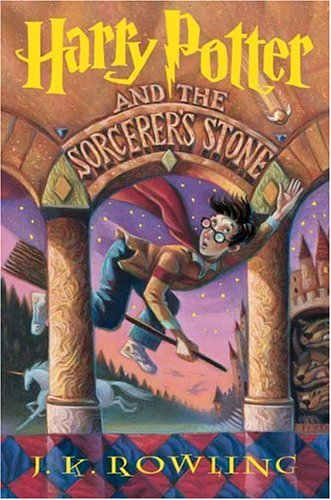

In [ ]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

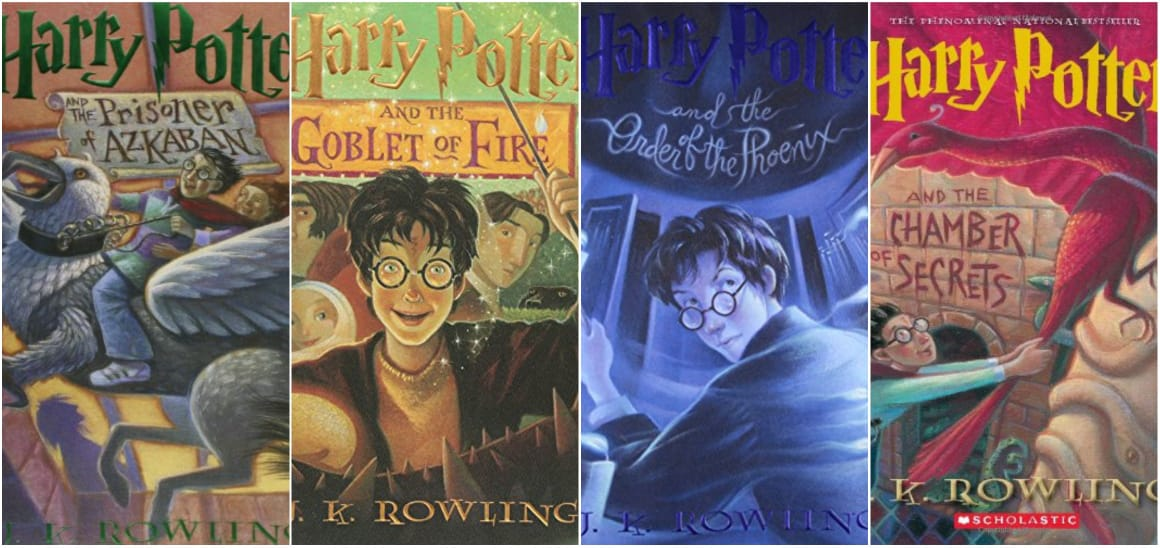


##<font color='blue'>**Great Our Model Is Working Fine**

#<font color='red'>**Collaborative Filtering based Recommendation System--(User-Item based)**

---



In [ ]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [ ]:
ratings_explicit.head()

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
1    276726  0155061224            5       5.000                        1
3    276729  052165615X            3       3.000                        1
4    276729  0521795028            6       6.000                        1
8    276744  038550120X            7       7.580                       81
16   276747  0060517794            9       8.000                       30

In [ ]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [ ]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [ ]:
interactions_from_selected_users_df.head(20)

User-ID        ISBN  Book-Rating  Avg_Rating  Total_No_Of_Users_Rated
0      2033  0030020786            7       7.000                        1
1      2033  0060248025           10       8.767                       30
2      2033  0060256664           10       8.333                        6
3      2033  0060256737           10       9.045                       22
4      2033  0060950536           10       9.400                        5
5      2033  0061020419            7       7.000                        1
6      2033  0061020427            6       6.000                        1
7      2033  0061056278           10       9.000                        2
8      2033  0061056286            8       7.667                        3
9      2033  0061056294            9       7.000                        2
10     2033  0061059773            7       7.000                        1
11     2033  0133502813           10      10.000                        1
12     2033  0140386645            8       8.040                       25
13     2033  0142000663           10       8.457                       35
14     2033  0142500135            7       7.667                        3
15     2033  0192800493            6       6.000                        1
16     2033  0201632721           10      10.000                        1
17     2033  0312921098            8       7.600                        5
18     2033  0316542377            9       9.500                        2
19     2033  0316779032           10       9.333                        3

In [ ]:
import math

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


ISBN  User-ID  Book-Rating
0  0000913154   171118        3.170
1  0001046438    23902        3.322
2  000104687X    23902        2.807
3  0001047213    23902        3.322
4  0001047973    23902        3.322

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'],
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [ ]:
interactions_test_df.head()

ISBN  User-ID  Book-Rating
87596  0879051213    95010        3.000
52630  0515101230   129074        3.000
68434  0679427724    75819        3.170
85835  0843951346   135149        3.322
92752  1551665727   158295        3.170

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN     0000913154  000104687X  0001047213  0001047973  000104799X  \
User-ID                                                               
2033          0.000       0.000       0.000       0.000       0.000   
2110          0.000       0.000       0.000       0.000       0.000   
2276          0.000       0.000       0.000       0.000       0.000   
4017          0.000       0.000       0.000       0.000       0.000   
4385          0.000       0.000       0.000       0.000       0.000   

ISBN     0001048082  0001053736  0001055607  0001056107  0001845039  ...  \
User-ID                                                              ...   
2033          0.000       0.000       0.000       0.000       0.000  ...   
2110          0.000       0.000       0.000       0.000       0.000  ...   
2276          0.000       0.000       0.000       0.000       0.000  ...   
4017          0.000       0.000       0.000       0.000       0.000  ...   
4385          0.000       0.000       0.000       0.000       0.000  ...   

ISBN     B00007FYKW  B00008RWPV  B00009NDAN  B0000DYXID  B0000T6KHI  \
User-ID                                                               
2033          0.000       0.000       0.000       0.000       0.000   
2110          0.000       0.000       0.000       0.000       0.000   
2276          0.000       0.000       0.000       0.000       0.000   
4017          0.000       0.000       0.000       0.000       0.000   
4385          0.000       0.000       0.000       0.000       0.000   

ISBN     B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
User-ID                                                              
2033          0.000       0.000       0.000       0.000       0.000  
2110          0.000       0.000       0.000       0.000       0.000  
2276          0.000       0.000       0.000       0.000       0.000  
4017          0.000       0.000       0.000       0.000       0.000  
4385          0.000       0.000       0.000       0.000       0.000  

[5 rows x 55743 columns]

In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(449, 55743)

In [ ]:
U.shape

(449, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 55743)

<font color='blue'>**After the Factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items and the user who haven't yet interacted, which we will explicit for recommendations.**

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [ ]:
all_user_predicted_ratings.shape

(449, 55743)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

2033    2110    2276    4017    4385    5582    6242    6251    \
ISBN                                                                         
0000913154   0.015  -0.001  -0.002   0.001  -0.002  -0.003  -0.003   0.007   
000104687X   0.002  -0.001  -0.002   0.017  -0.001   0.009   0.014   0.007   
0001047213   0.003  -0.001  -0.002   0.020  -0.001   0.010   0.016   0.009   
0001047973   0.003  -0.001  -0.002   0.020  -0.001   0.010   0.016   0.009   
000104799X   0.001   0.000   0.001   0.002   0.000   0.001   0.001   0.002   

            6543    6575    ...  269566  270713  271448  271705  273113  \
ISBN                        ...                                           
0000913154   0.001   0.013  ...   0.001   0.003  -0.002   0.008  -0.012   
000104687X  -0.003   0.016  ...  -0.002   0.013  -0.001   0.014  -0.005   
0001047213  -0.004   0.019  ...  -0.003   0.016  -0.001   0.016  -0.005   
0001047973  -0.004   0.019  ...  -0.003   0.016  -0.001   0.016  -0.005   
000104799X   0.002   0.004  ...   0.001   0.002   0.003   0.001   0.002   

            274061  274301  275970  277427  278418  
ISBN                                                
0000913154   0.001   0.008   0.004   0.011  -0.001  
000104687X  -0.006   0.008   0.002  -0.002   0.005  
0001047213  -0.007   0.009   0.002  -0.003   0.006  
0001047973  -0.007   0.009   0.002  -0.003   0.006  
000104799X   0.002   0.002   0.001   0.001   0.000  

[5 rows x 449 columns]

In [ ]:
len(cf_preds_df.columns)

449

In [ ]:
global books
books.head()

ISBN                                              title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 author     year                   Publisher Book-Title  
0    Mark P. O. Morford 2002.000     Oxford University Press        NaN  
1  Richard Bruce Wright 2001.000       HarperFlamingo Canada        NaN  
2          Carlo D'Este 1991.000             HarperPerennial        NaN  
3      Gina Bari Kolata 1999.000        Farrar Straus Giroux        NaN  
4       E. J. W. Barber 1999.000  W. W. Norton &amp; Company        NaN

In [ ]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df


cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(20))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):

        person_metrics = self.evaluate_model_for_user(model, userid)
        return

model_recommender = ModelRecommender()

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

##<font color=red>**Let's recommend books to User-Id 109901 and see the results.**

---



In [ ]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  109901
Recommendation for User-ID =  109901
          ISBN Book-Title  recStrength
0   0316666343        NaN        0.303
1   0312195516        NaN        0.224
2   0312966970        NaN        0.171
3   0345370775        NaN        0.170
4   059035342X        NaN        0.165
5   0440214041        NaN        0.164
6   0312980140        NaN        0.159
7   0671001795        NaN        0.156
8   0440211727        NaN        0.156
9   0446310786        NaN        0.156
10  0061009059        NaN        0.152
11  0316769487        NaN        0.149
12  0440226430        NaN        0.143
13  0446610038        NaN        0.142
14  0070212570        NaN        0.141
15  0385504209        NaN        0.139
16  0380718340        NaN        0.137
17  0345361792        NaN        0.136
18  0142001740        NaN        0.135
19  0440213525        NaN        0.134


# <font color='red'> **Evaluate**

---


## <font color='blue'>**In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.**

## <font color='blue'>**This evaluation method works as follows:**

* ## <font color='green'>**For each user**
    *  <font color='green'>**For each item the user has interacted in test set**
    *  <font color='green'>**Sample 100 other items the user has never interacted.**
    * <font color='green'>**Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items**
    * <font color='green'>**Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list**
    * <font color='green'>**Aggregate the global Top-N accuracy metrics**

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:

            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['ISBN'].values

            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics


    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):

        people_metrics = []

        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator()

In [ ]:
import random

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.23669813604454126, 'recall@10': 0.3037037037037037}


hits@5_count  hits@10_count  interacted_count  recall@5  recall@10  \
10           252            337              1389     0.181      0.243   
31           187            236              1138     0.164      0.207   
45            21             29               380     0.055      0.076   
30            82            104               369     0.222      0.282   
70            30             35               236     0.127      0.148   
7             27             40               204     0.132      0.196   
47            24             31               203     0.118      0.153   
50            21             38               193     0.109      0.197   
42            58             69               192     0.302      0.359   
43            22             30               188     0.117      0.160   

    User-ID  
10    11676  
31    98391  
45   189835  
30   153662  
70    23902  
7    235105  
47    76499  
50   171118  
42    16795  
43   248718

#<font color='red'>**Conclusion**

---



*  <font color='blue'>In EDA, the Top-10 most rated books were essentially **novels**. Books like **The Lovely Bone** and **The Secret Life of Bees** were very well perceived.<br>
* Majority of the readers were of the **age bracket 20-35** and most of them came from North American and European countries namely **USA, Canada, UK, Germany and Spain**.<br>
* If we look at the ratings distribution, **most of the books have high ratings** with maximum books being rated 8. Ratings below 5 are few in number.<br>
* Author with the most books was **Agatha Christie, William Shakespeare and Stephen King**.<br>
* For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error **(MAE)**.